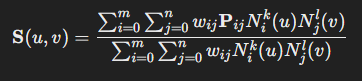

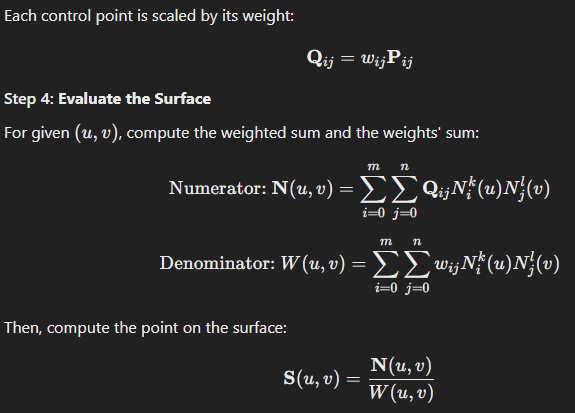

In [1]:
import numpy as np

# B-spline basis function (same as before)
def b_spline_basis(i, k, t, knots):
    if k == 0:
        return 1.0 if knots[i] <= t < knots[i+1] else 0.0
    else:
        denom1 = knots[i+k] - knots[i]
        denom2 = knots[i+k+1] - knots[i+1]
        term1 = ((t - knots[i]) / denom1) * b_spline_basis(i, k-1, t, knots) if denom1 > 0 else 0
        term2 = ((knots[i+k+1] - t) / denom2) * b_spline_basis(i+1, k-1, t, knots) if denom2 > 0 else 0
        return term1 + term2

# Rational B-spline surface
def rational_b_spline_surface(u, v, control_points, weights, knots_u, knots_v, degree_u, degree_v):
    m, n, _ = control_points.shape
    numerator = np.zeros(3)
    denominator = 0.0
    
    for i in range(m):
        for j in range(n):
            N_u = b_spline_basis(i, degree_u, u, knots_u)
            N_v = b_spline_basis(j, degree_v, v, knots_v)
            weight = weights[i, j]
            
            basis = N_u * N_v * weight
            numerator += basis * control_points[i, j]
            denominator += basis
            
    return numerator / denominator

# Example Control Points and Weights
control_points = np.array([
    [[0, 0, 0], [1, 0, 2], [2, 0, 2], [3, 0, 1], [4, 0, 0]],
    [[0, 1, 1], [1, 1, 3], [2, 1, 3], [3, 1, 2], [4, 1, 1]],
    [[0, 2, 1], [1, 2, 3], [2, 2, 4], [3, 2, 3], [4, 2, 1]],
    [[0, 3, 0], [1, 3, 2], [2, 3, 2], [3, 3, 1], [4, 3, 0]],
    [[0, 4, 0], [1, 4, 1], [2, 4, 1], [3, 4, 0], [4, 4, 0]],
])

weights = np.array([
    [1, 2, 3, 2, 1],
    [1, 2, 3, 2, 1],
    [1, 2, 3, 2, 1],
    [1, 2, 3, 2, 1],
    [1, 2, 3, 2, 1],
])

# Knot vectors (uniform)
knots_u = [0, 0, 0, 0, 1, 2, 3, 3, 3, 3]
knots_v = [0, 0, 0, 0, 1, 2, 3, 3, 3, 3]

# Degree of the spline
degree_u = 3
degree_v = 3

# Sample the surface
u_vals = np.linspace(knots_u[degree_u], knots_u[-degree_u-1], 30)
v_vals = np.linspace(knots_v[degree_v], knots_v[-degree_v-1], 30)

surface_points = np.array([
    rational_b_spline_surface(u, v, control_points, weights, knots_u, knots_v, degree_u, degree_v)
    for u in u_vals for v in v_vals
]).reshape((30, 30, 3))


C:\Users\User\AppData\Local\Temp\ipykernel_9432\174052378.py:30: RuntimeWarning: invalid value encountered in divide
  return numerator / denominator


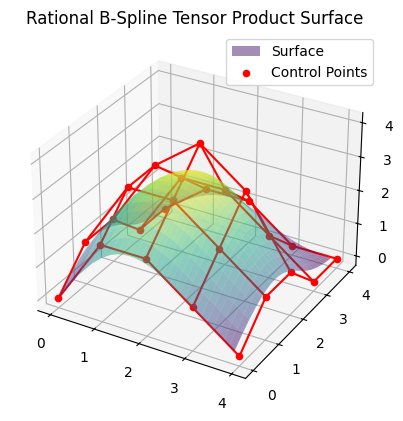

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates
X = surface_points[:, :, 0]
Y = surface_points[:, :, 1]
Z = surface_points[:, :, 2]

ax.plot_surface(X, Y, Z, cmap='viridis',alpha=0.5)
# Plot control points
for i in range(control_points.shape[0]):
    for j in range(control_points.shape[1]):
        ax.scatter(control_points[i, j, 0], control_points[i, j, 1], control_points[i, j, 2], c='r')
#plot control lines 
for i in range(5):
    for j in range(5):
        if i < 4:
            ax.plot([control_points[i][j][0], control_points[i+1][j][0]], [control_points[i][j][1], control_points[i+1][j][1]], [control_points[i][j][2], control_points[i+1][j][2]], color='r')
        if j < 4:
            ax.plot([control_points[i][j][0], control_points[i][j+1][0]], [control_points[i][j][1], control_points[i][j+1][1]], [control_points[i][j][2], control_points[i][j+1][2]], color='r')

plt.title('Rational B-Spline Tensor Product Surface')
plt.legend(['Surface', 'Control Points'])
plt.show()
